# RozwiƒÖzanie

In [1]:
using LinearAlgebra, Statistics, DataFrames, Polynomials, Plots, CSV, TaylorSeries

## Zadanie 1 

In [2]:
# mno≈ºenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [3]:
# poprawiona funkcja korzytajƒÖca z powy≈ºszego oraz z faktu, ≈ºe
# mo≈ºna zmieniaƒá kolejno≈õƒá operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [4]:
function BLAS(A, B)
    A*B
end

BLAS (generic function with 1 method)

In [5]:
df = DataFrame(Type = String[], Size = Int[], Time = Float64[])
for size = 2:50:502
    for i = 1:11
        A = rand(0:9,(size, size))
        B = rand(0:9,(size, size))
        time1 = @elapsed naive_multiplication(A, B)
        time2 = @elapsed better_multiplication(A, B)
        time3 = @elapsed BLAS(A, B)
        if i > 1
            push!(df, ("Naive", size, time1))
            push!(df, ("Better", size, time2))
            push!(df, ("BLAS", size, time3))
        end
    end
end


In [7]:
df2 = combine(groupby(df, [:Size, :Type]), :Time => mean, :Time => std)

33√ó4 DataFrame
 Row ‚îÇ Size   Type    Time_mean   Time_std    
     ‚îÇ Int64  String  Float64     Float64     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ     2  Naive   2.1e-7      3.14289e-7
   2 ‚îÇ     2  Better  1.1e-7      5.67646e-8
   3 ‚îÇ     2  BLAS    1.2e-7      6.32456e-8
   4 ‚îÇ    52  Naive   0.00034472  5.02898e-6
   5 ‚îÇ    52  Better  0.00017543  7.66725e-6
   6 ‚îÇ    52  BLAS    0.00010419  1.61648e-5
   7 ‚îÇ   102  Naive   0.00282806  6.05082e-5
   8 ‚îÇ   102  Better  0.00123944  3.94893e-5
   9 ‚îÇ   102  BLAS    0.00062496  2.01189e-5
  10 ‚îÇ   152  Naive   0.0098105   0.000183118
  11 ‚îÇ   152  Better  0.00421792  0.000724055
  ‚ãÆ  ‚îÇ   ‚ãÆ      ‚ãÆ         ‚ãÆ            ‚ãÆ
  24 ‚îÇ   352  BLAS    0.0266211   0.00210816
  25 ‚îÇ   402  Naive   0.20334     0.0119138
  26 ‚îÇ   402  Better  0.0809515   0.0107718
  27 ‚îÇ   402  BLAS    0.0427077   0.00667365
  28 ‚îÇ   452  Naive   0.283113    0.0115516
  29 ‚îÇ   452  Better  0.113363    0.00833068
  30 ‚îÇ   452  BLAS    0.0621214   0.0133311
  31 ‚îÇ   502  Naive   0.40176     0.0409954
  32 ‚îÇ   502  Better  0.173735    0.0354582
  33 ‚îÇ   502  BLAS    0.0811783   0.0112597
                               12 rows omitted

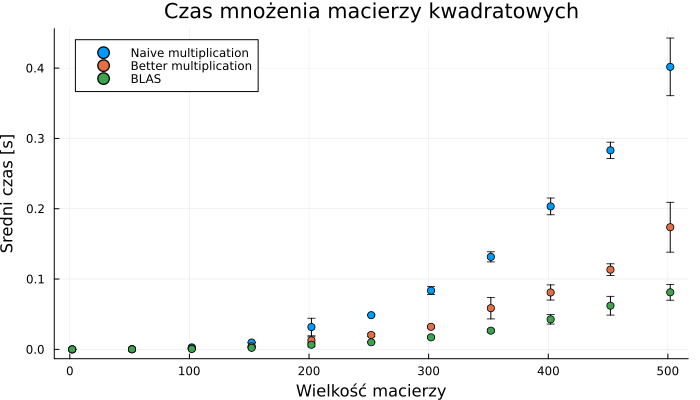

In [8]:
scatter(df2[df2[:,2] .== "Naive", :].Size,
    size = (700, 400),
    xlabel = "Wielko≈õƒá macierzy",
    ylabel = "≈öredni czas [s]",
    label = ["Naive multiplication" "Better multiplication" "BLAS"],
    title = "Czas mno≈ºenia macierzy kwadratowych", 
    [df2[df2[:,2] .== "Naive", :].Time_mean df2[df2[:,2] .== "Better", :].Time_mean df2[df2[:,2] .== "BLAS", :].Time_mean],
    yerr = [df2[df2[:,2] .== "Naive", :].Time_std df2[df2[:,2] .== "Better", :].Time_std df2[df2[:,2] .== "BLAS", :].Time_std])


## Zadanie 2

``` c
#include <stdio.h>
#include <gsl/gsl_blas.h>
#include <gsl/gsl_sf_bessel.h>
#include <sys/times.h>
#include <stdlib.h>
#include <unistd.h>
#include <fcntl.h>

struct tms tms_start, tms_end;
clock_t clock_start, clock_end;

void start_time() {
    clock_start = times(&tms_start);
}

void end_time() {
    clock_end = times(&tms_end);
}

double time() {
    int tics = sysconf(_SC_CLK_TCK);
    double time = (double) (clock_end - clock_start) / tics;
    return time;
}

void naive_multiplication(double **A, double **B, double **C, int size) {
    for (int i = 0; i < size; i++) {
        for (int j = 0; j < size; j++) {
            for (int k = 0; k < size; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

void better_multiplication(double **A, double **B, double **C, int size) {
    for (int i = 0; i < size; i++) {
        for (int k = 0; k < size; k++) {
            for (int j = 0; j < size; j++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

void blas_multiplication(double *a, double *b, double *c, int size) {
    gsl_matrix_view D = gsl_matrix_view_array(a, size, size);
    gsl_matrix_view E = gsl_matrix_view_array(b, size, size);
    gsl_matrix_view F = gsl_matrix_view_array(c, size, size);
    gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0, &D.matrix, &E.matrix, 0.0, &F.matrix);
}

int main(int argc, char *argv[]) {
    double **A, **B, **C;
    double *a, *b, *c;
    double time1, time2, time3;
    FILE *file = fopen("times.csv", "a");
    for (int i = 2; i <= 502; i += 50) {
        A = calloc(i, sizeof(double *));
        B = calloc(i, sizeof(double *));
        C = calloc(i, sizeof(double *));
        a = calloc(i * i, sizeof(double));
        b = calloc(i * i, sizeof(double));
        c = calloc(i * i, sizeof(double));
        for (int j = 0; j < i; j++) {
            A[j] = calloc(i, sizeof(double));
            B[j] = calloc(i, sizeof(double));
            C[j] = calloc(i, sizeof(double));
        }
        for (int j = 0; j < 10; j++) {
            for (int k = 0; k < i; k++) {
                for (int a = 0; a < i; a++) {
                    A[k][a] = rand() % 10;
                    B[k][a] = rand() % 10;
                }
            }
            start_time();
            naive_multiplication(A, B, C, i);
            end_time();
            time1 = time();

            start_time();
            better_multiplication(A, B, C, i);
            end_time();
            time2 = time();

            for (int k = 0; k < i * i; k++) {
                a[k] = A[k / i][k % i];
                b[k] = B[k / i][k % i];
            }

            start_time();
            blas_multiplication(a, b, c, i);
            end_time();
            time3 = time();

            fprintf(file, "%d,%f,%f,%f\n", i, time1, time2, time3);
        }
        for (int j = 0; j < i; j++) {
            free(A[j]);
            free(B[j]);
            free(C[j]);
        }
        free(a);
        free(b);
        free(c);
        free(A);
        free(B);
        free(C);
    }
    fclose(file);
    return 0;
}
```

In [9]:
data = CSV.read("times.csv", delim =",", DataFrame)
data2 = combine(groupby(data, :Size), :Naive => mean, :Naive =>std, :Better => mean, :Better =>std, :BLAS => mean, :BLAS =>std)

11√ó7 DataFrame
 Row ‚îÇ Size   Naive_mean  Naive_std   Better_mean  Better_std  BLAS_mean  BLAS ‚ãØ
     ‚îÇ Int64  Float64     Float64     Float64      Float64     Float64    Floa ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ     2       0.0    0.0               0.0    0.0             0.0    0.0  ‚ãØ
   2 ‚îÇ    52       0.007  0.0105935         0.008  0.0113529       0.005  0.00
   3 ‚îÇ   102       0.045  0.0217307         0.034  0.00699206      0.024  0.01
   4 ‚îÇ   152       0.108  0.00788811        0.118  0.018738        0.062  0.01
   5 ‚îÇ   202       0.264  0.0142984         0.266  0.0195505       0.162  0.01 ‚ãØ
   6 ‚îÇ   252       0.532  0.0229976         0.501  0.0196921       0.299  0.01
   7 ‚îÇ   302       0.91   0.0713364         0.88   0.0444722       0.532  0.03
   8 ‚îÇ   352       1.135  0.0283823         1.035  0.0406202       0.617  0.03
   9 ‚îÇ   402       1.932  0.122819          1.6    0.0959166       0.918  0.02 ‚ãØ
  10 ‚îÇ   452       2.898  0.466376          2.31   0.429082        1.338  0.24
  11 ‚îÇ   502       4.375  0.625447          3.592  0.493171        2.092  0.32
                                                                1 column omitted

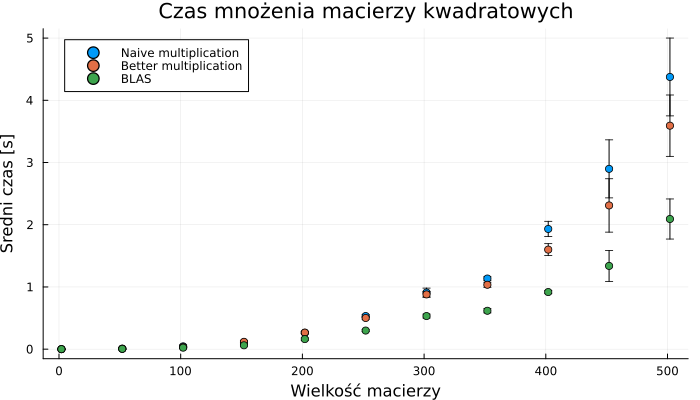

In [10]:
scatter(data2.Size,
    size = (700, 400),
    xlabel = "Wielko≈õƒá macierzy",
    ylabel = "≈öredni czas [s]",
    label = ["Naive multiplication" "Better multiplication" "BLAS"],
    title = "Czas mno≈ºenia macierzy kwadratowych", 
    [data2.Naive_mean data2.Better_mean data2.BLAS_mean],
    yerr = [data2.Naive_std data2.Better_std data2.BLAS_std])


## Zadanie 3

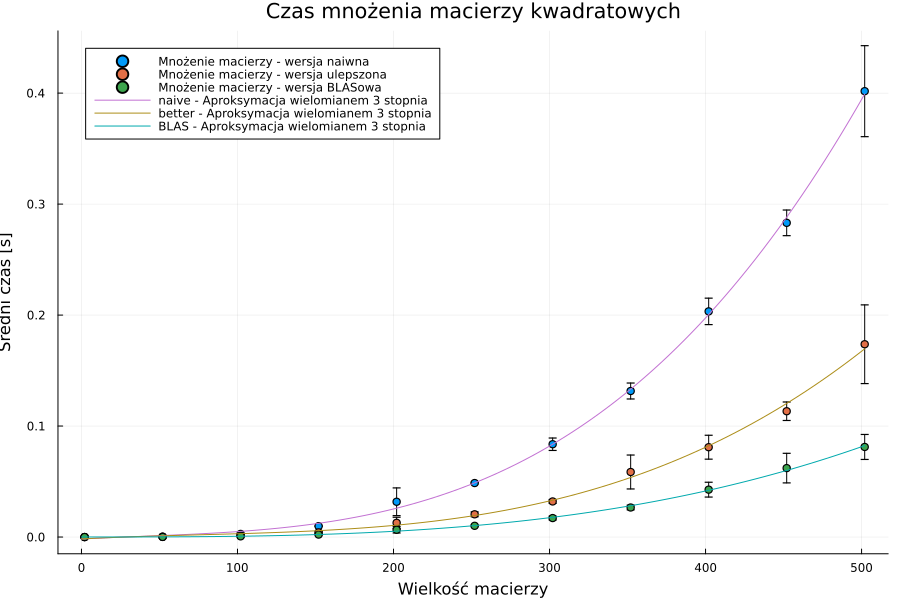

In [11]:
fit1 = fit(df2[df2[:,2] .== "Naive", :].Size, df2[df2[:,2] .== "Naive", :].Time_mean, 3)
fit2 = fit(df2[df2[:,2] .== "Better", :].Size, df2[df2[:,2] .== "Better", :].Time_mean, 3)
fit3 = fit(df2[df2[:,2] .== "BLAS", :].Size, df2[df2[:,2] .== "BLAS", :].Time_mean, 3)
xs = 0:1:502

scatter(df2[df2[:,2] .== "Naive", :].Size,
    size = (900, 600),
    xlabel = "Wielko≈õƒá macierzy",
    ylabel = "≈öredni czas [s]",
    label = ["Mno≈ºenie macierzy - wersja naiwna" "Mno≈ºenie macierzy - wersja ulepszona" "Mno≈ºenie macierzy - wersja BLASowa"],
    title = "Czas mno≈ºenia macierzy kwadratowych", 
    [df2[df2[:,2] .== "Naive", :].Time_mean df2[df2[:,2] .== "Better", :].Time_mean df2[df2[:,2] .== "BLAS", :].Time_mean],
    yerr = [df2[df2[:,2] .== "Naive", :].Time_std df2[df2[:,2] .== "Better", :].Time_std df2[df2[:,2] .== "BLAS", :].Time_std])


plot!(fit1, extrema(xs)..., label = "naive - Aproksymacja wielomianem 3 stopnia")
plot!(fit2, extrema(xs)..., label = "better - Aproksymacja wielomianem 3 stopnia")
plot!(fit3, extrema(xs)..., label = "BLAS - Aproksymacja wielomianem 3 stopnia")


## Zadanie 4


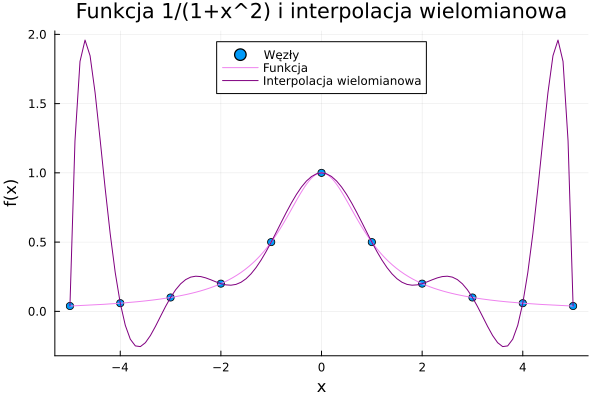

In [12]:
function f(x)
    1/(1+x^2)
end
    
xs = -5:1:5
ys = map(f, xs)
poly_aprox = fit(xs, ys, 10)

scatter(xs,
        ys,
        title = "Funkcja 1/(1+x^2) i interpolacja wielomianowa",
        xlabel = "x",
        ylabel = "f(x)",
        label = "Wƒôz≈Çy",
        legend_position = :top)

plot!(f,
    extrema(xs)...,
    label="Funkcja",
    color = :violet)

plot!(poly_aprox,
    extrema(xs)...,
    label="Interpolacja wielomianowa",
    color = :purple)

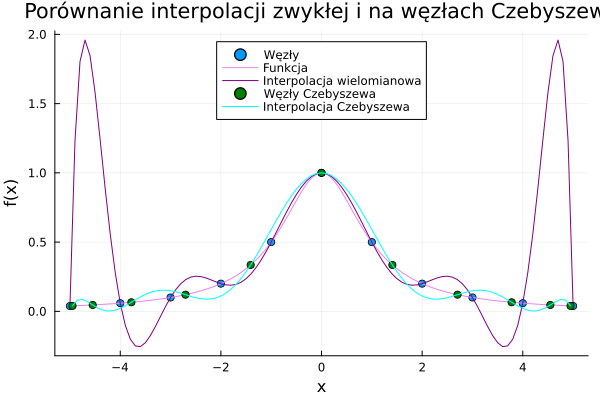

In [13]:
base = [0,0,0,0,0,0,0,0,0,0,0,1]
chebyszev = ChebyshevT(base)
che_poly_zeros  = Polynomials.roots(chebyszev)
che_poly_zeros  = 5 * che_poly_zeros 
ys2 = map(f, che_poly_zeros)
poly_approx_che = fit(che_poly_zeros, ys2, 10)
scatter!(
    che_poly_zeros, 
    ys2, 
    label = "Wƒôz≈Çy Czebyszewa",
    color = :green, 
    title="Por√≥wnanie interpolacji zwyk≈Çej i na wƒôz≈Çach Czebyszewa",
)

plot!(poly_approx_che,
    extrema(che_poly_zeros)...,
    label = "Interpolacja Czebyszewa",
    color = :cyan
)

## Zadanie 5

In [14]:
t = Taylor1(Float64, 5)

 1.0 t + ùí™(t‚Å∂)

In [15]:
function myfun(x)
    log(1+x)/x
end

myfun (generic function with 1 method)

In [16]:
myfun_taylor = myfun(t)

 1.0 - 0.5 t + 0.3333333333333333 t¬≤ - 0.25 t¬≥ + 0.2 t‚Å¥ + ùí™(t‚Åµ)

In [17]:
myfun_taylor_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 - 0.5*x + 0.3333333333333333*x^2 - 0.25*x^3 + 0.2*x^4)

In [18]:
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_taylor_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.6999999999999987*x + 0.03333333333333298*x^2), Polynomial(1.0 + 1.1999999999999986*x + 0.29999999999999905*x^2), :x)

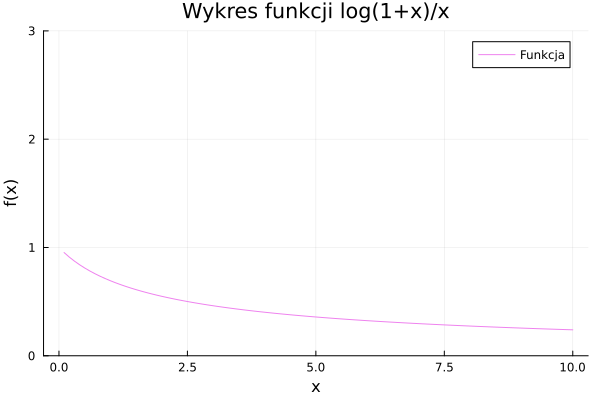

In [19]:
xsf = 0:0.1:10
y1 = [myfun(x) for x in xsf]
y2 = [myfun_taylor_pol(x) for x in xsf]
y3 = [myfun_pade(x) for x in xsf]


plot(xsf,
    y1,
    xlabel = "x",
    ylabel = "f(x)",
    ylims = [0,3],
    title = "Wykres funkcji log(1+x)/x",
    label = "Funkcja",
    color = :violet)

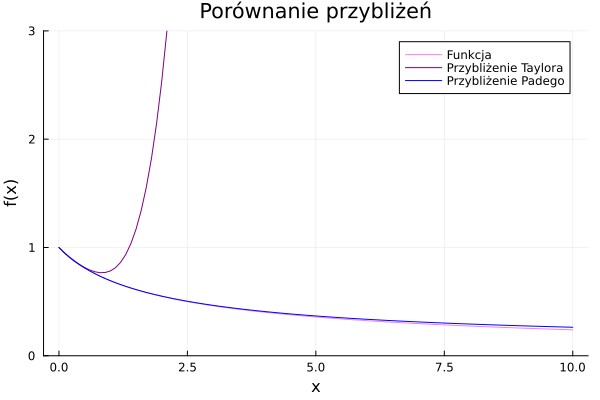

In [20]:
plot(xsf,
    [y1 y2 y3],
    xlabel = "x",
    ylabel = "f(x)",
    ylims = [0,3],
    title = "Por√≥wnanie przybli≈ºe≈Ñ",
    label = ["Funkcja" "Przybli≈ºenie Taylora" "Przybli≈ºenie Padego"],
    color = [:violet :purple :blue])